# *The Sparks Foundation* 
# *Task 1 - Prediction Using Supervised Machine Learning*

# *Yuaan Hussain Raheem*

# Predict the percentage of a student based on the number of hours they study using Linear Regression

### Importing all the necessary libraries

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading the dataset
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv") 

In [3]:
# First five rows of the dataset. Each row shows the marks and the number of hours each student studied
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Numer of rows and columns of the dataset (rows, columns)
data.shape

(25, 2)

In [5]:
# General information of the dataset including data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# General calculations of numeric values of the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### The Distribution of Scores using Scatter Plot

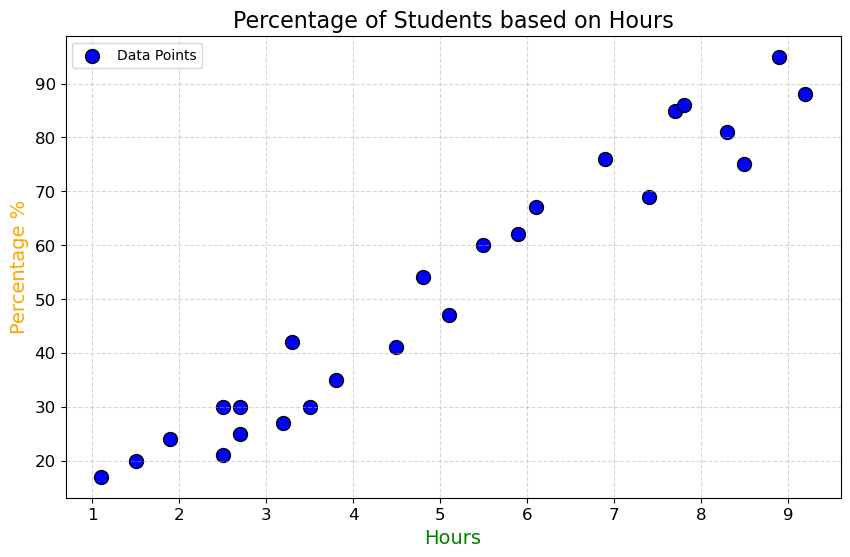

In [7]:
plt.figure(figsize=(10,6)) #figure size
plt.scatter(  # scatter plot
    data["Hours"], # x-axis
    data["Scores"], # y-axis
    marker="o", # indicator
    color="blue", # color of the indicator
    s=100,  # Set marker size
    edgecolors="black",  # Marker edge color
    linewidths=1,  # Marker edge width
    label="Data Points",  # Add a label for the legend
)

plt.title("Percentage of Students based on Hours", fontsize=16) #heading of the graph
plt.xlabel("Hours", color="green", fontsize=14) # labelling x-axis
plt.ylabel("Percentage %", color="orange", fontsize=14) # labelling y-axis

plt.grid(True, linestyle="--", alpha=0.5) #grid lines
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

#### A positive linear relation is shown from the scatter plot above between hours and percentage

### Preparing the dataset for training

In [8]:
x=data.iloc[:, :-1].values
y=data.iloc[:,1].values

### Train Test Split
#### Splittiing the data into training and test sets

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=0)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((7, 1), (7,), (18, 1), (18,))

### Training the Model

In [10]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(x_train, y_train) 

LinearRegression()

In [11]:
model.intercept_

1.0979263522987566

In [12]:
model.coef_

array([9.8479817])

### Plotting the regression line

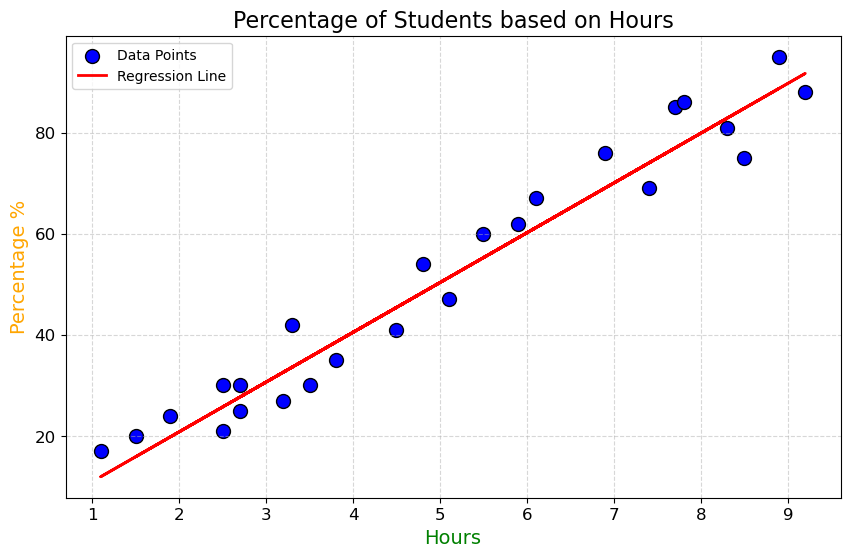

In [13]:
line = model.coef_*x+model.intercept_ #calculating the line
plt.figure(figsize=(10,6)) #figure size
plt.scatter(  # scatter plot
    data["Hours"], # x-axis
    data["Scores"], # y-axis
    marker="o", # indicator
    color="blue", # color of the indicator
    s=100,  # Set marker size
    edgecolors="black",  # Marker edge color
    linewidths=1,  # Marker edge width
    label="Data Points",  # Add a label for the legend
)
plt.plot(x, line, color="red", linewidth=2, label="Regression Line") # line graph

plt.title("Percentage of Students based on Hours", fontsize=16) #heading of the graph
plt.xlabel("Hours", color="green", fontsize=14) # labelling x-axis
plt.ylabel("Percentage %", color="orange", fontsize=14) # labelling y-axis

plt.grid(True, linestyle="--", alpha=0.5) #grid lines
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Making Predictions through our algorithm

In [14]:
y_pred=model.predict(x_test)
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]]


### Comparing actual and predicted 

In [15]:
#Actual VS Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,15.869899
1,27,32.611468
2,69,73.972991
3,30,25.717881
4,62,59.201018
5,35,38.520257
6,24,19.809092
7,86,77.912184
8,76,69.049000
9,17,11.930706


### Visualizing Actual and Predicted

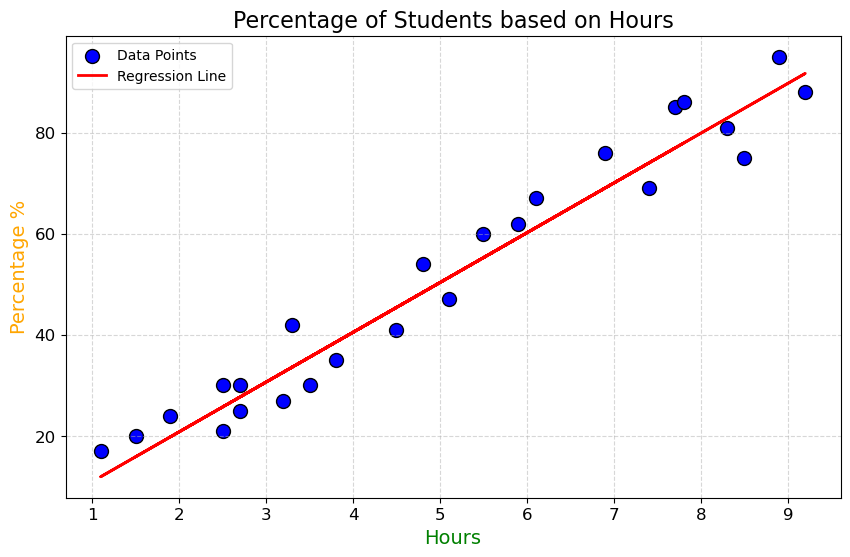

In [16]:
line = model.coef_*x+model.intercept_
plt.figure(figsize=(10,6)) #figure size
plt.scatter(  # scatter plot
    data["Hours"], # x-axis
    data["Scores"], # y-axis
    marker="o", # indicator
    color="blue", # color of the indicator
    s=100,  # Set marker size
    edgecolors="black",  # Marker edge color
    linewidths=1,  # Marker edge width
    label="Data Points",  # Add a label for the legend
)
plt.plot(x_test, y_pred, color="red", linewidth=2, label="Regression Line")

plt.title("Percentage of Students based on Hours", fontsize=16) #heading of the graph
plt.xlabel("Hours", color="green", fontsize=14) # labelling x-axis
plt.ylabel("Percentage %", color="orange", fontsize=14) # labelling y-axis

plt.grid(True, linestyle="--", alpha=0.5) #grid lines
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Calculating predicted score if student studies 9.25hr per day

In [17]:
hours=[[9.25]]
predicted_score=model.predict(hours)
print("No of hours",hours[0],"and score is",predicted_score)

No of hours [9.25] and score is [92.19175707]


### Evaluating the model

In [18]:
from sklearn import metrics
print("Mean Absolute Error is",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error is 5.001787485958392
